Импорт библиотек

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import networkx as nx

Импорт листов

In [20]:
description = pd.read_excel('../data/socio.xls', sheet_name='Description', skiprows=4, index_col=0) #описание исходных данных

#листы
M1 = pd.read_excel('../data/socio.xls', sheet_name='M1')
M2 = pd.read_excel('../data/socio.xls', sheet_name='M2')
M3 = pd.read_excel('../data/socio.xls', sheet_name='M3')
M4 = pd.read_excel('../data/socio.xls', sheet_name='M4')
M5 = pd.read_excel('../data/socio.xls', sheet_name='M5')
M6 = pd.read_excel('../data/socio.xls', sheet_name='M6')
M7 = pd.read_excel('../data/socio.xls', sheet_name='M7')
M8 = pd.read_excel('../data/socio.xls', sheet_name='M8')
M9 = pd.read_excel('../data/socio.xls', sheet_name='M9')

In [9]:
description

,Вопрос
Лист,
M1,1.С кем бы Вы хотели сидеть за одной партой?
M2,2.С кем бы Вы НЕ хотели сидеть за одной партой?
M3,3.Кого бы Вы хотели пригласить на свой День Ро...
M4,4.Кого бы Вы НЕ хотели пригласить на свой День...
M5,5.Кого бы Вы назначили старостой группы?
M6,6.Кого бы Вы НЕ назначили старостой группы?
M7,7.С кем из своих одногруппников Вы бы хотели п...
M8,8.С кем из своих одногруппников Вы бы НЕ хотел...
M9,9.Кого из одногруппников Вы считаете своим дру...


In [35]:
def matrix_unite(data_1, data_2):
    '''Объединяет две социоматрицы с положительными
    и отрицательными признаками под одному вопросу, например, 
    матрицы 
    
    С кем бы Вы хотели сидеть за одной партой?
    С кем бы Вы НЕ хотели сидеть за одной партой?
    
    и считает число отданных и полученных выборов
    '''
    data = data_1 - data_2
    data['+'] = data_1.sum(axis=1)
    data['-'] = data_2.sum(axis=1)
    data['sums'] = data_1.sum(axis=1) + data_2.sum(axis=1) #надо как-то убрать повторные пересчёты
    data.loc['+'] = data_1.sum(axis=0)
    data.loc['-'] = data_2.sum(axis=0)
    data.loc['sums'] = data_1.sum(axis=0) + data_2.sum(axis=0)
    data.loc['+', '+'] = data_1.sum(axis=1).sum()
    data.loc['-', '-'] = data_2.sum(axis=1).sum()
    data.loc['sums', 'sums'] = (data_1.sum(axis=0) + data_2.sum(axis=0)).sum()
    return data

In [36]:
question_1 = matrix_unite(M1, M2)
question_2 = matrix_unite(M3, M4)
question_3 = matrix_unite(M5, M6)
question_4 = matrix_unite(M7, M8)

In [45]:
print(np.array(question_1))

[[ 0.  0.  1.  0.  0.  1.  0.  0. -1.  0.  0.  0.  1.  0.  3.  1.  4.]
 [-1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  7.  1.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  2.  1.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  2.  0.  2.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0. -1.  0.  0.  2.  1.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  1.  1.  2.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0. 

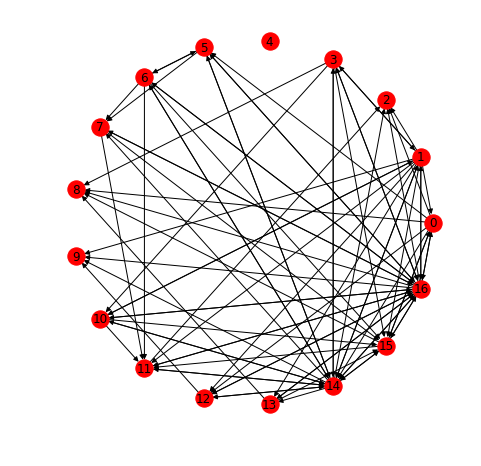

In [60]:
plt.figure(figsize=(6, 6))

G = nx.DiGraph(np.array(question_1))

nx.draw(G, pos=nx.shell_layout(G), with_labels=True)